# Atendimentos AS Volta Redonda Mai/23 a Out/23 (A)

## Importando e Tratando Base Feegow

In [103]:
import pandas as pd

# Importando a base de tempo de espera pré-tratativa CX
df_a_completo = pd.read_csv('/home/lucasmateus/dbt-projects/projetos_lucas/cx/tempo_medio_espera/tempo_espera_volta_redonda_a.csv')

In [104]:
# Filter data from July 1st onwards (inclusive)
df_a_completo['dt_agendamento'] = df_a_completo['dt_agendamento'].str.strip("'")
df_a_completo['dt_agendamento'] = pd.to_datetime(df_a_completo['dt_agendamento'], format='%Y-%m-%d')
df_a_completo = df_a_completo[df_a_completo['dt_agendamento'] >= '2023-07-01']
df_a_completo.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo
0,864343100,2023-11-01,19643,AmorSaúde Volta Redonda,Gilson Ribeiro De Carvalho,13:38:14.000,Atendido,3,Cardiologia,3,NaN


In [105]:
df_a_completo.dtypes

id_agendamento               int64
dt_agendamento      datetime64[ns]
id_unidade                   int64
unidade                     object
nm_profissional             object
hora                        object
nome_status                 object
status_id                    int64
nm_especialidade            object
fila_status                  int64
duracao_tempo               object
dtype: object

In [106]:
df_a = df_a_completo.dropna(subset=['duracao_tempo'])

In [107]:
df_a.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo
1,864343100,2023-11-01,19643,AmorSaúde Volta Redonda,Gilson Ribeiro De Carvalho,13:28:50.000,Em atendimento,2,Cardiologia,2,0 00:09:24.000


In [108]:
# Function to convert time duration string to seconds
def time_str_to_seconds(time_str):
    # Check if the value starts with a hyphen ("-")
    if time_str.startswith('-'):
        return None  # Return None for negative values
    # Check if there is an extra leading zero
    elif time_str.startswith('0 '):
        # Remove the extra leading zero if present
        time_str = time_str[2:]  # Remove the extra leading zero
    
    # Remove milliseconds from the time string
    time_str = time_str.split('.')[0]
    
    # Split the time string into hours, minutes, and seconds
    parts = time_str.split(':')
    
    # Convert the parts to integers
    hours, minutes, seconds = map(int, parts)
    
    # Calculate the total seconds
    total_seconds = hours * 3600 + minutes * 60 + seconds
    
    return total_seconds

# Convert the duracao_tempo column to seconds
df_a['duracao_tempo_seconds'] = df_a['duracao_tempo'].apply(time_str_to_seconds)

# Drop rows with negative values
df_a = df_a.dropna(subset=['duracao_tempo_seconds'])


/tmp/ipykernel_15601/568554916.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['duracao_tempo_seconds'] = df_a['duracao_tempo'].apply(time_str_to_seconds)


In [109]:
# Create a new column duracao_tempo_minutes by dividing duracao_tempo_seconds by 60
df_a['duracao_tempo_minutes'] = df_a['duracao_tempo_seconds'] / 60

/tmp/ipykernel_15601/3280060836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['duracao_tempo_minutes'] = df_a['duracao_tempo_seconds'] / 60


In [110]:
df_a.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo,duracao_tempo_seconds,duracao_tempo_minutes
1,864343100,2023-11-01,19643,AmorSaúde Volta Redonda,Gilson Ribeiro De Carvalho,13:28:50.000,Em atendimento,2,Cardiologia,2,0 00:09:24.000,564.0,9.4


In [111]:
# Filter rows where status_id is 4 (for waiting)
df_a_espera = df_a[df_a['status_id'] == 4]

# Filter rows where status_id is 2 (for service)
df_a_atendimento = df_a[df_a['status_id'] == 2]

In [112]:
df_a_espera.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo,duracao_tempo_seconds,duracao_tempo_minutes
2,864343100,2023-11-01,19643,AmorSaúde Volta Redonda,Gilson Ribeiro De Carvalho,13:25:47.000,Aguardando,4,Cardiologia,1,0 00:03:03.000,183.0,3.05


In [113]:
df_a_atendimento.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo,duracao_tempo_seconds,duracao_tempo_minutes
1,864343100,2023-11-01,19643,AmorSaúde Volta Redonda,Gilson Ribeiro De Carvalho,13:28:50.000,Em atendimento,2,Cardiologia,2,0 00:09:24.000,564.0,9.4


## Análise Exploratória do Tempo de Espera

In [195]:
# Importanto bibliotecas gráficas
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn plots
sns.set(style="white")
sns.despine(top=True, right=True, left=True, bottom=True)

<Figure size 640x480 with 0 Axes>

In [177]:
# Descriptive analysis and boxplot for df_a_espera
print("Descriptive statistics for df_a_espera:")
descriptive_stats_espera = df_a_espera['duracao_tempo_minutes'].describe().round().astype(int)
print(descriptive_stats_espera)


Descriptive statistics for df_a_espera:
count    10254
mean        38
std         41
min          0
25%         13
50%         28
75%         50
max        575
Name: duracao_tempo_minutes, dtype: int64


In [207]:
print("\nDescriptive statistics for df_a_espera:")
descriptive_stats_espera = df_a_espera['duracao_tempo_minutes'].describe().round(1)#.astype(int)

# Convert Series to DataFrame
descriptive_stats_df = descriptive_stats_espera.to_frame().reset_index()

# Optional: Rename columns for clarity
descriptive_stats_df.columns = ['Statistic', 'Value']

descriptive_stats_df


Descriptive statistics for df_a_espera:


,Statistic,Value
0,count,10254.0
1,mean,37.7
2,std,40.6
3,min,0.0
4,25%,12.6
5,50%,28.1
6,75%,50.0
7,max,575.5


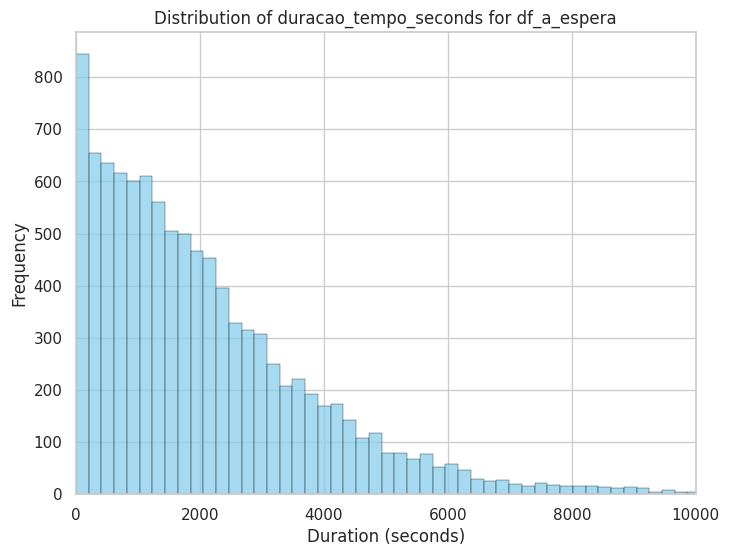

In [193]:
# Plot histogram for duracao_tempo_seconds for df_a_espera
plt.figure(figsize=(8, 6))
sns.histplot(data=df_a_espera, x='duracao_tempo_seconds', color='skyblue', edgecolor='black')
plt.title('Distribution of duracao_tempo_seconds for df_a_espera')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

# Set x-axis limits
plt.xlim(0, 10000)  # Adjust the limits based on your dataset
plt.grid(True)
plt.show()

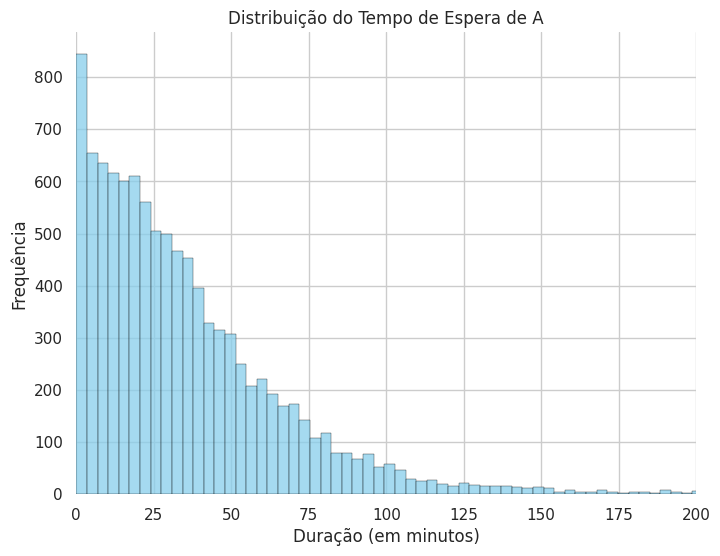

In [201]:

# Plot histogram for duracao_tempo_minutes for df_a_espera
plt.figure(figsize=(8, 6))
sns.histplot(data=df_a_espera, x='duracao_tempo_minutes', color='skyblue', edgecolor='black')
plt.title('Distribuição do Tempo de Espera de A')
plt.xlabel('Duração (em minutos)')
plt.ylabel('Frequência')

# Set x-axis limits
plt.xlim(0, 200)  # Adjust the limits based on your dataset
plt.grid(True)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

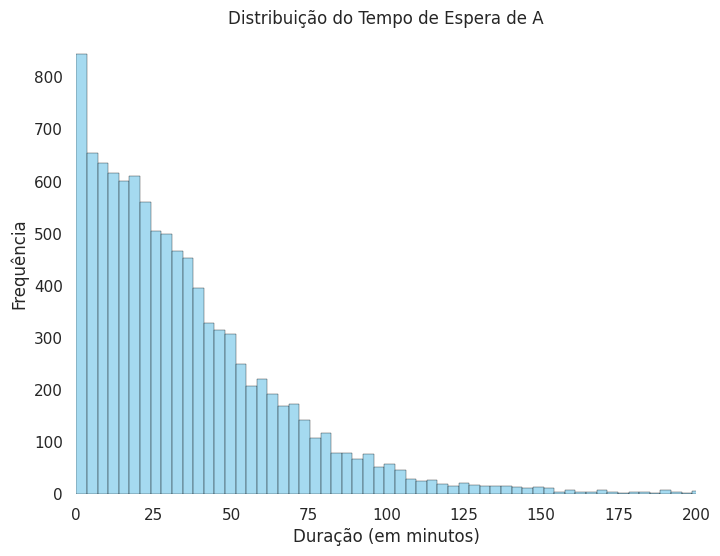

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram for duracao_tempo_minutes for df_a_espera
plt.figure(figsize=(8, 6))
sns.histplot(data=df_a_espera, x='duracao_tempo_minutes', color='skyblue', edgecolor='black')
plt.title('Distribuição do Tempo de Espera de A')
plt.xlabel('Duração (em minutos)')
plt.ylabel('Frequência')
sns.despine(top=True, right=True, left=True, bottom=True)

# Set x-axis limits
plt.xlim(0, 200)  # Adjust the limits based on your dataset

# Remove gridlines (since you already set white style)
plt.grid(False)  # No need for sns.despine() with white style

# Save the figure
plt.savefig('histograma_espera_a.png')  # Saves as PNG by default

plt.show()  # Optional: Display the plot before saving (you can comment this out)


In [119]:
# Descriptive analysis segmented by nm_especialidade for df_a_espera
print("\nDescriptive statistics for df_a_espera segmented by nm_especialidade:")
descriptive_stats_espera_segmented = df_a_espera.groupby('nm_especialidade')['duracao_tempo_minutes'].describe().round().astype(int)


# Sort by the median (50th percentile)
descriptive_stats_espera_segmented_sorted = descriptive_stats_espera_segmented.sort_values(by='50%', ascending=True)
descriptive_stats_espera_segmented_sorted


Descriptive statistics for df_a_espera segmented by nm_especialidade:


,count,mean,std,min,25%,50%,75%,max
nm_especialidade,,,,,,,,
Otorrinolaringologia,419,21,20,0,6,14,29,114
Medicina de Família e Comunidade,465,20,21,0,7,16,26,169
Ortopedia e Traumatologia,1039,22,25,0,7,17,31,550
Us e doppler,8,29,31,3,12,18,30,102
Cardiologia,853,26,21,0,10,20,35,140
Gastroenterologia,430,27,24,0,9,22,40,273
Endocrinologia,551,27,22,0,11,23,36,139
Pediatria,454,30,27,0,8,23,47,172
Angiologia,213,28,22,1,14,23,39,151


## Análise Exploratória do Tempo de Atendimento

In [208]:
# Descriptive analysis and boxplot for df_a_atendimento
print("\nDescriptive statistics for df_a_atendimento:")
descriptive_stats_atendimento = df_a_atendimento['duracao_tempo_minutes'].describe().round(1)#.astype(int)
print(descriptive_stats_atendimento)


Descriptive statistics for df_a_atendimento:
count    10302.0
mean        11.1
std         12.5
min          0.0
25%          4.9
50%          8.0
75%         12.9
max        339.4
Name: duracao_tempo_minutes, dtype: float64


In [186]:
print("\nDescriptive statistics for df_a_atendimento:")
descriptive_stats_atendimento = df_a_atendimento['duracao_tempo_minutes'].describe().round().astype(int)

# Convert Series to DataFrame
descriptive_stats_df = descriptive_stats_atendimento.to_frame().reset_index()

# Optional: Rename columns for clarity
descriptive_stats_df.columns = ['Statistic', 'Value']

descriptive_stats_df


Descriptive statistics for df_a_atendimento:


,Statistic,Value
0,count,10302
1,mean,11
2,std,13
3,min,0
4,25%,5
5,50%,8
6,75%,13
7,max,339


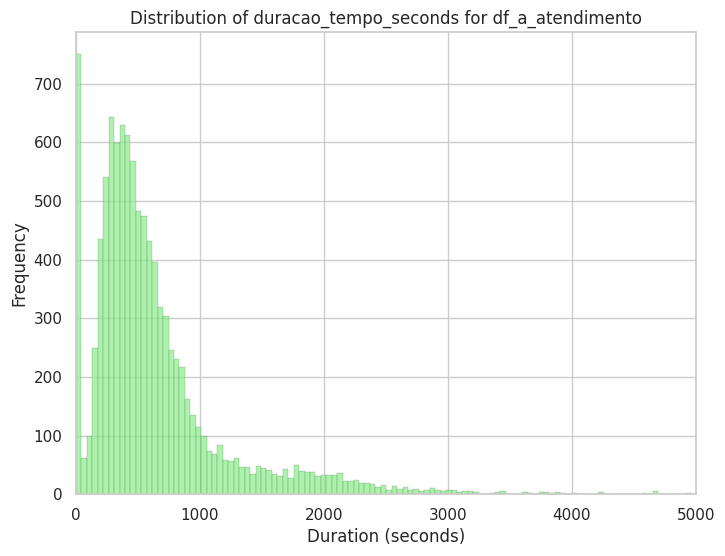

In [121]:
# Plot histogram for duracao_tempo_seconds for df_a_atendimento
plt.figure(figsize=(8, 6))
sns.histplot(data=df_a_atendimento, x='duracao_tempo_seconds', color='lightgreen', edgecolor='black')
plt.title('Distribution of duracao_tempo_seconds for df_a_atendimento')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

# Set x-axis limits
plt.xlim(0, 5000)  # Adjust the limits based on your dataset
plt.grid(True)
plt.show()

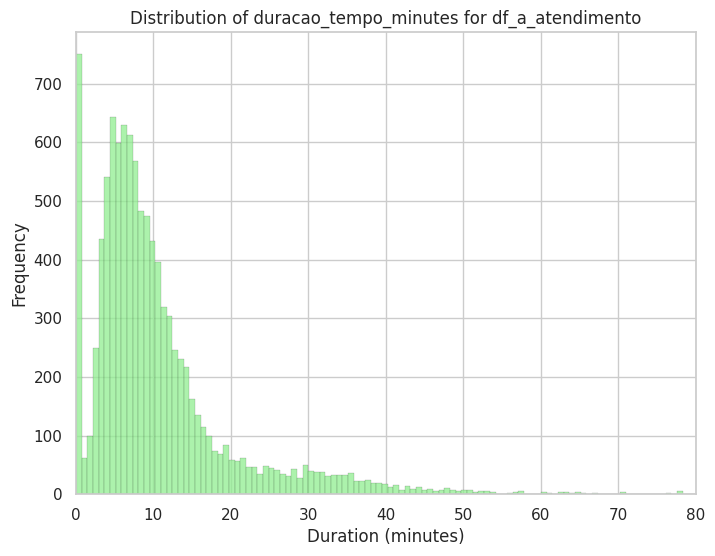

In [122]:
# Plot histogram for duracao_tempo_minutes for df_a_atendimento
plt.figure(figsize=(8, 6))
sns.histplot(data=df_a_atendimento, x='duracao_tempo_minutes', color='lightgreen', edgecolor='black')
plt.title('Distribution of duracao_tempo_minutes for df_a_atendimento')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# Set x-axis limits
plt.xlim(0, 80)  # Adjust the limits based on your dataset
plt.grid(True)
plt.show()

In [124]:
# Descriptive analysis segmented by nm_especialidade for df_a_atendimento
print("\nDescriptive statistics for df_a_atendimento segmented by nm_especialidade:")
descriptive_stats_atendimento_segmented = df_a_atendimento.groupby('nm_especialidade')['duracao_tempo_minutes'].describe().round().astype(int)

# Sort by the median (50th percentile)
descriptive_stats_atendimento_segmented_sorted = descriptive_stats_atendimento_segmented.sort_values(by='50%', ascending=True)
descriptive_stats_atendimento_segmented_sorted


Descriptive statistics for df_a_atendimento segmented by nm_especialidade:


,count,mean,std,min,25%,50%,75%,max
nm_especialidade,,,,,,,,
Neurologia,444,0,1,0,0,0,0,10
Fisioterapia,65,2,16,0,0,0,0,130
Angiologia,214,5,7,0,3,3,5,91
Ortopedia e Traumatologia,1053,6,9,0,4,5,7,175
Medicina de Família e Comunidade,460,7,11,0,4,5,7,171
Cardiologia,851,6,4,0,4,6,8,41
Otorrinolaringologia,424,7,4,0,4,6,8,36
Endocrinologia,551,7,5,0,4,6,8,58
Dermatologia,731,8,3,0,6,7,9,40


# Atendimento AS Volta Redonda Nov/23 a Fev/24 (B)

## Importando e Tratando Base Feegow

In [125]:
# Importing the CX pre-treatment waiting time database
df_b_completo = pd.read_csv('/home/lucasmateus/dbt-projects/projetos_lucas/cx/tempo_medio_espera/tempo_espera_volta_redonda_b.csv')

In [126]:
df_b_completo.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo
0,874756464,'2024-03-01',19643,AmorSaúde Volta Redonda,Larissa Fernandes Martins Messias,17:35:13.000,Atendido,3,Psicologia,3,NaN


In [127]:
df_b = df_b_completo.dropna(subset=['duracao_tempo'])

In [128]:
df_b.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo
1,874756464,'2024-03-01',19643,AmorSaúde Volta Redonda,Larissa Fernandes Martins Messias,16:32:31.000,Em atendimento,2,Psicologia,2,0 01:02:42.000


In [129]:
# Convert the duracao_tempo column to seconds
df_b['duracao_tempo_seconds'] = df_b['duracao_tempo'].apply(time_str_to_seconds)

/tmp/ipykernel_15601/1189470043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['duracao_tempo_seconds'] = df_b['duracao_tempo'].apply(time_str_to_seconds)


In [130]:
# Drop rows with negative values
df_b = df_b.dropna(subset=['duracao_tempo_seconds'])

In [131]:
# Create a new column duracao_tempo_minutes by dividing duracao_tempo_seconds by 60
df_b['duracao_tempo_minutes'] = df_b['duracao_tempo_seconds'] / 60

/tmp/ipykernel_15601/56378167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['duracao_tempo_minutes'] = df_b['duracao_tempo_seconds'] / 60


In [132]:
df_b.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo,duracao_tempo_seconds,duracao_tempo_minutes
1,874756464,'2024-03-01',19643,AmorSaúde Volta Redonda,Larissa Fernandes Martins Messias,16:32:31.000,Em atendimento,2,Psicologia,2,0 01:02:42.000,3762.0,62.7


In [133]:
# Filter rows where status_id is 4 (for waiting)
df_b_espera = df_b[df_b['status_id'] == 4]

In [134]:
# Filter rows where status_id is 2 (for service)
df_b_atendimento = df_b[df_b['status_id'] == 2]


In [135]:
df_b_espera.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo,duracao_tempo_seconds,duracao_tempo_minutes
2,874756464,'2024-03-01',19643,AmorSaúde Volta Redonda,Larissa Fernandes Martins Messias,15:40:46.000,Aguardando,4,Psicologia,1,0 00:51:45.000,3105.0,51.75


In [136]:
df_b_atendimento.head(1)

,id_agendamento,dt_agendamento,id_unidade,unidade,nm_profissional,hora,nome_status,status_id,nm_especialidade,fila_status,duracao_tempo,duracao_tempo_seconds,duracao_tempo_minutes
1,874756464,'2024-03-01',19643,AmorSaúde Volta Redonda,Larissa Fernandes Martins Messias,16:32:31.000,Em atendimento,2,Psicologia,2,0 01:02:42.000,3762.0,62.7


## Análise Exploratória do Tempo de Espera

In [209]:
# Descriptive analysis and boxplot for df_b_espera
print("Descriptive statistics for df_b_espera:")
descriptive_stats_espera = df_b_espera['duracao_tempo_minutes'].describe().round(1)#.astype(int)
print(descriptive_stats_espera)

Descriptive statistics for df_b_espera:
count    9769.0
mean       41.5
std        42.7
min         0.0
25%        14.8
50%        32.0
75%        54.2
max       554.2
Name: duracao_tempo_minutes, dtype: float64


In [184]:
print("\nDescriptive statistics for df_b_espera:")
descriptive_stats_espera = df_b_espera['duracao_tempo_minutes'].describe().round().astype(int)

# Convert Series to DataFrame
descriptive_stats_df = descriptive_stats_espera.to_frame().reset_index()

# Optional: Rename columns for clarity
descriptive_stats_df.columns = ['Statistic', 'Value']

descriptive_stats_df


Descriptive statistics for df_b_espera:


,Statistic,Value
0,count,9769
1,mean,42
2,std,43
3,min,0
4,25%,15
5,50%,32
6,75%,54
7,max,554


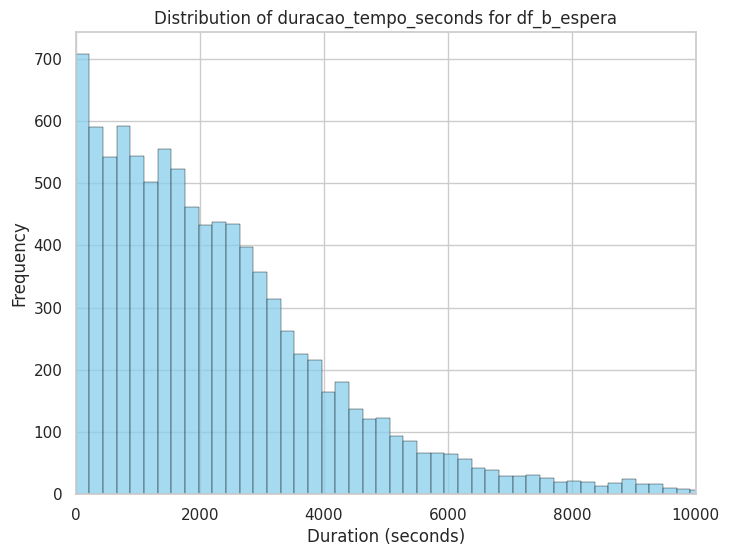

In [138]:
# Plot histogram for duracao_tempo_seconds for df_b_espera
plt.figure(figsize=(8, 6))
sns.histplot(data=df_b_espera, x='duracao_tempo_seconds', color='skyblue', edgecolor='black')
plt.title('Distribution of duracao_tempo_seconds for df_b_espera')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

# Set x-axis limits
plt.xlim(0, 10000)  # Adjust the limits based on your dataset
plt.grid(True)
plt.show()

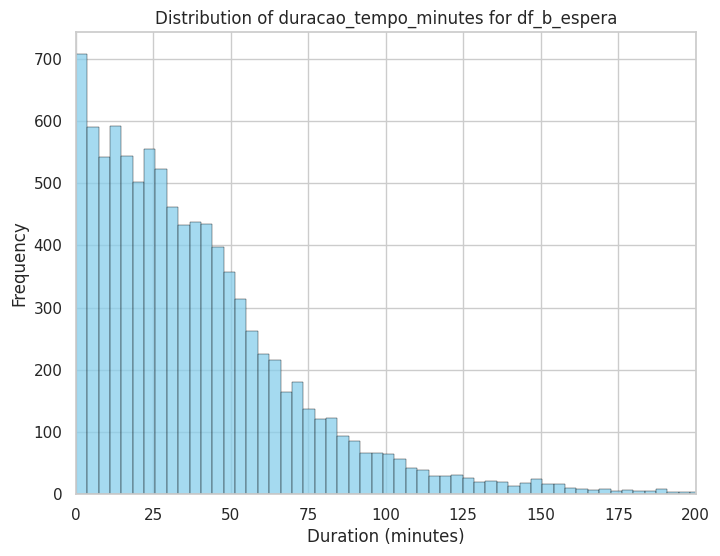

In [139]:
# Plot histogram for duracao_tempo_minutes for df_b_espera
plt.figure(figsize=(8, 6))
sns.histplot(data=df_b_espera, x='duracao_tempo_minutes', color='skyblue', edgecolor='black')
plt.title('Distribution of duracao_tempo_minutes for df_b_espera')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# Set x-axis limits
plt.xlim(0, 200)  # Adjust the limits based on your dataset
plt.grid(True)
plt.show()

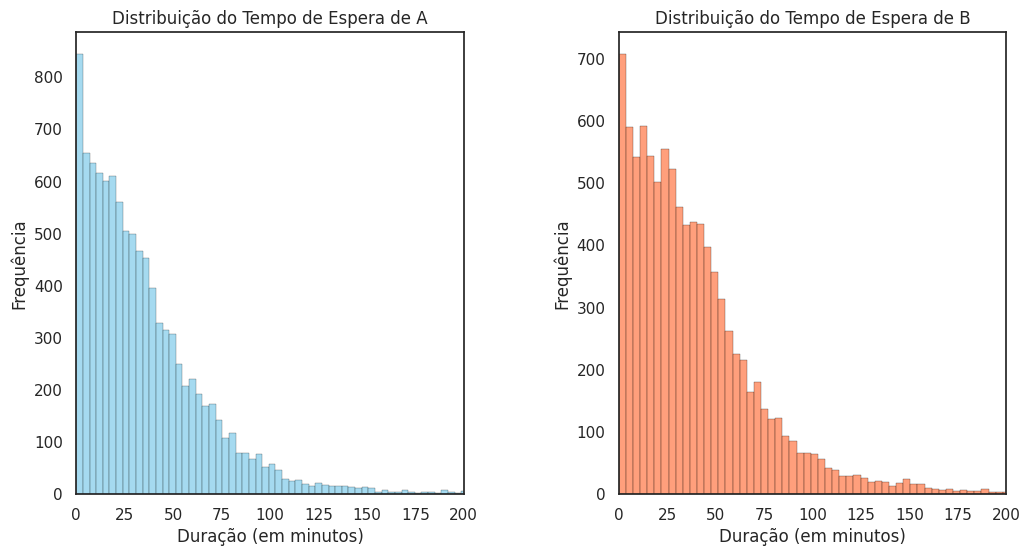

In [202]:
# Assuming your dataframes are named df_a_espera and df_b_espera

# Set the background style (optional)
plt.figure(figsize=(12, 6))  # Adjust figure size for side-by-side plots
sns.set_style("white")  # Optional: Set white background (no grid)

# Plot histograms side-by-side using subplots (similar to method 1 from previous response)
plt.subplot(1, 2, 1)  # First subplot for df_a_espera

sns.histplot(data=df_a_espera, x='duracao_tempo_minutes', color='skyblue', edgecolor='black')
plt.title('Distribuição do Tempo de Espera de A')
plt.xlabel('Duração (em minutos)')
plt.ylabel('Frequência')
plt.xlim(0, 200)  # Adjust x-axis limits based on your data

# Remove gridlines (not needed with white style)
plt.grid(False)

plt.subplot(1, 2, 2)  # Second subplot for df_b_espera

sns.histplot(data=df_b_espera, x='duracao_tempo_minutes', color='coral', edgecolor='black')
plt.title('Distribuição do Tempo de Espera de B')
plt.xlabel('Duração (em minutos)')
plt.ylabel('Frequência')
plt.xlim(0, 200)  # Adjust x-axis limits based on your data

# Optional: Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)  # Adjust spacing as needed

# Save the figure with a descriptive name
plt.savefig('histograma_espera_AB.png')  # Saves as PNG by default

plt.show()  # Optional: Display the plot before saving

In [141]:
# Descriptive analysis segmented by nm_especialidade for df_b_espera
print("\nDescriptive statistics for df_b_espera segmented by nm_especialidade:")
descriptive_stats_espera_segmented = df_b_espera.groupby('nm_especialidade')['duracao_tempo_minutes'].describe().round().astype(int)


# Sort by the median (50th percentile)
descriptive_stats_espera_segmented_sorted = descriptive_stats_espera_segmented.sort_values(by='50%', ascending=True)
descriptive_stats_espera_segmented_sorted


Descriptive statistics for df_b_espera segmented by nm_especialidade:


,count,mean,std,min,25%,50%,75%,max
nm_especialidade,,,,,,,,
Otorrinolaringologia,371,21,19,0,7,17,29,119
Gastroenterologia,353,21,18,0,6,17,33,141
Angiologia,147,23,22,0,9,18,30,142
Medicina de Família e Comunidade,412,24,22,0,8,18,33,142
Ginecologia e Obstetrícia,108,28,22,0,13,22,44,107
Cardiologia,749,28,20,1,12,23,40,133
Endocrinologia,568,30,27,0,11,24,42,261
Pediatria,325,33,31,0,8,24,50,153
Ortopedia e Traumatologia,852,28,23,0,12,26,41,256


## Análise Exploratória Tempo de Atendimento

In [178]:
print("\nDescriptive statistics for df_b_atendimento:")
descriptive_stats_atendimento = df_b_atendimento['duracao_tempo_minutes'].describe().round().astype(int)
descriptive_stats_atendimento


Descriptive statistics for df_b_atendimento:


count    9832
mean       11
std        18
min         0
25%         5
50%         8
75%        13
max       599
Name: duracao_tempo_minutes, dtype: int64

In [181]:
print("\nDescriptive statistics for df_b_atendimento:")
descriptive_stats_atendimento = df_b_atendimento['duracao_tempo_minutes'].describe().round().astype(int)

# Convert Series to DataFrame
descriptive_stats_df = descriptive_stats_atendimento.to_frame().reset_index()

# Optional: Rename columns for clarity
descriptive_stats_df.columns = ['Statistic', 'Value']

descriptive_stats_df


Descriptive statistics for df_b_atendimento:


,Statistic,Value
0,count,9832
1,mean,11
2,std,18
3,min,0
4,25%,5
5,50%,8
6,75%,13
7,max,599


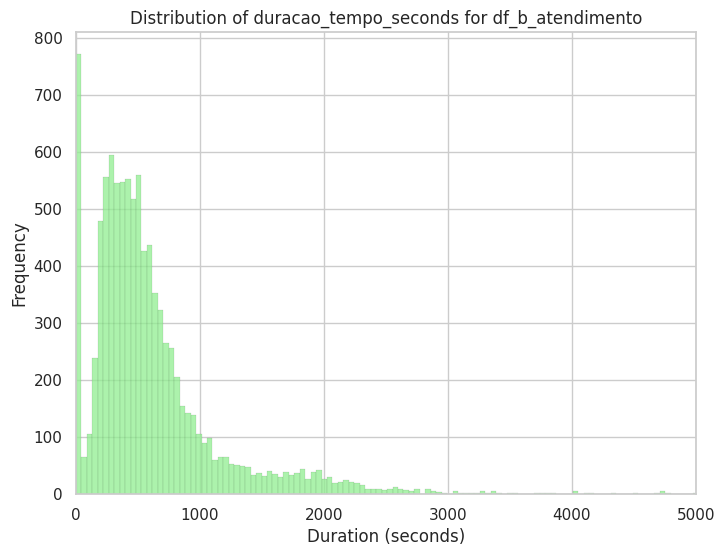

In [143]:
# Plot histogram for duracao_tempo_seconds for df_b_atendimento
plt.figure(figsize=(8, 6))
sns.histplot(data=df_b_atendimento, x='duracao_tempo_seconds', color='lightgreen', edgecolor='black')
plt.title('Distribution of duracao_tempo_seconds for df_b_atendimento')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

# Set x-axis limits
plt.xlim(0, 5000)  # Adjust the limits based on your dataset
plt.grid(True)
plt.show()

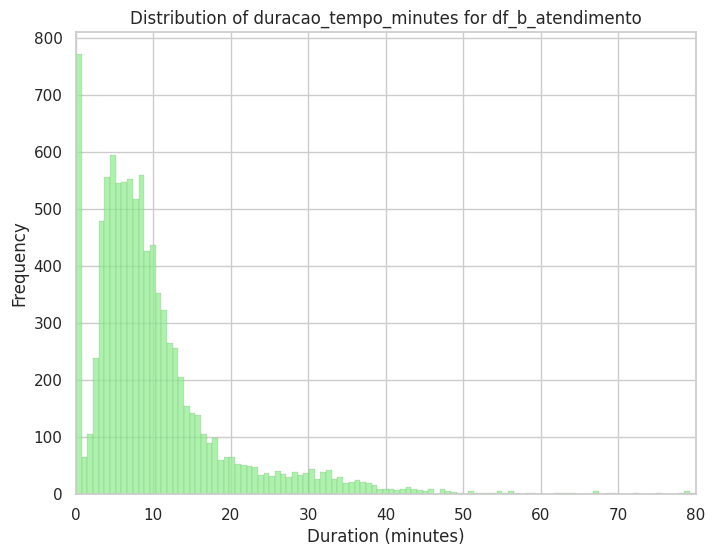

In [144]:
# Plot histogram for duracao_tempo_minutes for df_b_atendimento
plt.figure(figsize=(8, 6))
sns.histplot(data=df_b_atendimento, x='duracao_tempo_minutes', color='lightgreen', edgecolor='black')
plt.title('Distribution of duracao_tempo_minutes for df_b_atendimento')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# Set x-axis limits
plt.xlim(0, 80)  # Adjust the limits based on your dataset
plt.grid(True)
plt.show()

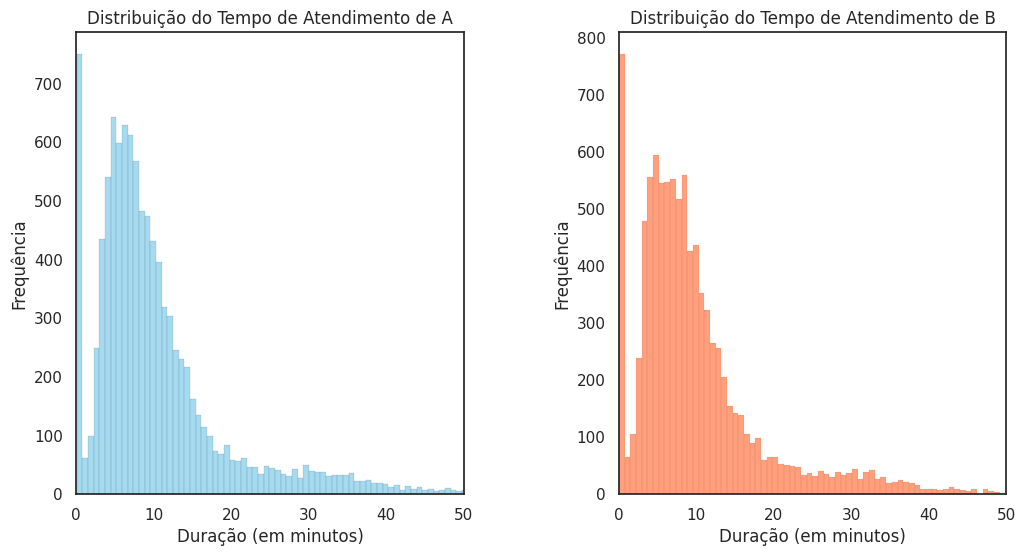

In [206]:
# Assuming your dataframes are named df_a_espera and df_b_espera

# Set the background style (optional)
plt.figure(figsize=(12, 6))  # Adjust figure size for side-by-side plots
sns.set_style("white")  # Optional: Set white background (no grid)

# Plot histograms side-by-side using subplots (similar to method 1 from previous response)
plt.subplot(1, 2, 1)  # First subplot for df_a_espera

sns.histplot(data=df_a_atendimento, x='duracao_tempo_minutes', color='skyblue', edgecolor='black')
plt.title('Distribuição do Tempo de Atendimento de A')
plt.xlabel('Duração (em minutos)')
plt.ylabel('Frequência')
plt.xlim(0, 50)  # Adjust x-axis limits based on your data

# Remove gridlines (not needed with white style)
plt.grid(False)

plt.subplot(1, 2, 2)  # Second subplot for df_b_espera

sns.histplot(data=df_b_atendimento, x='duracao_tempo_minutes', color='coral', edgecolor='black')
plt.title('Distribuição do Tempo de Atendimento de B')
plt.xlabel('Duração (em minutos)')
plt.ylabel('Frequência')
plt.xlim(0, 50)  # Adjust x-axis limits based on your data

# Optional: Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)  # Adjust spacing as needed

# Save the figure with a descriptive name
plt.savefig('histograma_atendimento_AB.png')  # Saves as PNG by default

plt.show()  # Optional: Display the plot before saving

In [146]:
# Descriptive analysis segmented by nm_especialidade for df_b_atendimento
print("\nDescriptive statistics for df_b_atendimento segmented by nm_especialidade:")
descriptive_stats_atendimento_segmented = df_b_atendimento.groupby('nm_especialidade')['duracao_tempo_minutes'].describe().round().astype(int)

# Sort by the median (50th percentile)
descriptive_stats_atendimento_segmented_sorted = descriptive_stats_atendimento_segmented.sort_values(by='50%', ascending=True)
descriptive_stats_atendimento_segmented_sorted


Descriptive statistics for df_b_atendimento segmented by nm_especialidade:


,count,mean,std,min,25%,50%,75%,max
nm_especialidade,,,,,,,,
Neurologia,439,0,3,0,0,0,0,67
Fisioterapia,73,1,4,0,0,0,0,32
Angiologia,151,5,6,0,3,4,5,69
Otorrinolaringologia,378,7,7,0,4,5,7,90
Ortopedia e Traumatologia,867,6,9,0,4,5,6,185
Medicina de Família e Comunidade,413,6,6,0,4,5,7,87
Urologia,192,6,3,0,4,5,8,18
Cardiologia,746,7,7,0,4,6,8,123
Endocrinologia,570,6,5,0,4,6,8,64


# Comparação Estatística das Medianas - Teste A/B

In [168]:
import scipy
from scipy import stats

shapiro_wilk = scipy.stats.shapiro

# Perform the Shapiro-Wilk test
stat, p_value = shapiro_wilk(df_a_espera['duracao_tempo_minutes'])

# Interpretation
if p_value > 0.05:  # Adjust significance level as needed
  print("The data appears to be normally distributed (Shapiro-Wilk test).")
else:
  print("The data appears to be non-normal (Shapiro-Wilk test).")

The data appears to be non-normal (Shapiro-Wilk test).


In [169]:
# Perform the Shapiro-Wilk test
stat, p_value = shapiro_wilk(df_b_espera['duracao_tempo_minutes'])

# Interpretation
if p_value > 0.05:  # Adjust significance level as needed
  print("The data appears to be normally distributed (Shapiro-Wilk test).")
else:
  print("The data appears to be non-normal (Shapiro-Wilk test).")

The data appears to be non-normal (Shapiro-Wilk test).


In [170]:
# Perform the Shapiro-Wilk test
stat, p_value = shapiro_wilk(df_a_atendimento['duracao_tempo_minutes'])

# Interpretation
if p_value > 0.05:  # Adjust significance level as needed
  print("The data appears to be normally distributed (Shapiro-Wilk test).")
else:
  print("The data appears to be non-normal (Shapiro-Wilk test).")

The data appears to be non-normal (Shapiro-Wilk test).


/usr/lib/python3/dist-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [171]:
# Perform the Shapiro-Wilk test
stat, p_value = shapiro_wilk(df_b_atendimento['duracao_tempo_minutes'])

# Interpretation
if p_value > 0.05:  # Adjust significance level as needed
  print("The data appears to be normally distributed (Shapiro-Wilk test).")
else:
  print("The data appears to be non-normal (Shapiro-Wilk test).")

The data appears to be non-normal (Shapiro-Wilk test).


/usr/lib/python3/dist-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [158]:
import scipy.stats as stats

# Hypothesis testing: H0 - medians are similar, H1 - medians in df_b are higher

# Compare espera (waiting time)
espera_a_median = df_a_espera['duracao_tempo_minutes'].median()
espera_b_median = df_b_espera['duracao_tempo_minutes'].median()
u_espera, p_value_espera = stats.mannwhitneyu(df_a_espera['duracao_tempo_minutes'], df_b_espera['duracao_tempo_minutes'])

# Compare atendimento (service time)
atendimento_a_median = df_a_atendimento['duracao_tempo_minutes'].median()
atendimento_b_median = df_b_atendimento['duracao_tempo_minutes'].median()
u_atendimento, p_value_atendimento = stats.mannwhitneyu(df_a_atendimento['duracao_tempo_minutes'], df_b_atendimento['duracao_tempo_minutes'])

# Interpret the results
print("Espera:")
if p_value_espera < 0.05:  # Adjust significance level as needed
    print(f"There is a statistically significant difference (p-value = {p_value_espera:.4f})")
    if espera_b_median > espera_a_median:
        print(f"The median waiting time in df_b_espera ({espera_b_median:.2f} minutes) is higher than in df_a_espera ({espera_a_median:.2f} minutes).")
    else:
        print("The medians are not significantly different.")
else:
    print(f"There is no statistically significant difference in medians (p-value = {p_value_espera:.4f})")

print("\nAtendimento:")
if p_value_atendimento < 0.05:  # Adjust significance level as needed
    print(f"There is a statistically significant difference (p-value = {p_value_atendimento:.4f})")
    if atendimento_b_median > atendimento_a_median:
        print(f"The median service time in df_b_atendimento ({atendimento_b_median:.2f} minutes) is higher than in df_a_atendimento ({atendimento_a_median:.2f} minutes).")
    else:
        print("The medians are not significantly different.")
else:
    print(f"There is no statistically significant difference in medians (p-value = {p_value_atendimento:.4f})")


Espera:
There is a statistically significant difference (p-value = 0.0000)
The median waiting time in df_b_espera (31.97 minutes) is higher than in df_a_espera (28.12 minutes).

Atendimento:
There is no statistically significant difference in medians (p-value = 0.0671)


In [216]:
# Calculate the medians
median_b_espera = df_b_espera['duracao_tempo_seconds'].median()
median_a_espera = df_a_espera['duracao_tempo_seconds'].median()

# Ensure average_waiting_time_a is positive to avoid division by zero
if median_a_espera <= 0:
  print("Median waiting time in df_a_espera cannot be zero or negative for percentage calculation.")
else:
  # Calculate percentage difference
  percentage_difference = ((median_b_espera - median_a_espera) / median_a_espera) * 100

  # Print the result with formatting
  print(f"The median waiting time in df_b_espera is approximately {percentage_difference:.2f}% higher than in df_a_espera.")

The median waiting time in df_b_espera is approximately 13.66% higher than in df_a_espera.


In [215]:
# Calculate the medians
median_b_espera = df_b_espera['duracao_tempo_minutes'].median().round().astype(int)
median_a_espera = df_a_espera['duracao_tempo_minutes'].median().round().astype(int)

# Ensure average_waiting_time_a is positive to avoid division by zero
if median_a_espera <= 0:
  print("Median waiting time in df_a_espera cannot be zero or negative for percentage calculation.")
else:
  # Calculate percentage difference
  percentage_difference = ((median_b_espera - median_a_espera) / median_a_espera) * 100

  # Print the result with formatting
  print(f"The median waiting time in df_b_espera is approximately {percentage_difference:.2f}% higher than in df_a_espera.")

The median waiting time in df_b_espera is approximately 14.29% higher than in df_a_espera.


In [217]:
median_b_espera

1918.0

In [218]:
median_a_espera

1687.5

In [188]:
df_a_espera.to_excel('espera_a.xlsx', index=False, sheet_name='bd')
df_a_atendimento.to_excel('atendimento_a.xlsx', index=False, sheet_name='bd')